# Testing `eugene.dataset` Module 

**Authorship:**
Adam Klie, *06/23/2022*
***
**Description:**
Notebook to test the `dataset` module of the `eugene` package
***
<div class="alert alert-block alert-warning">
<b>TODOs</b>:
<ul>
    <b><li></li></b>
    <b><li></li></b>
    <b><li></li></b>
    </ul>
</div>

# Set-up

In [1]:
# The classics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Autoreload extension
if 'autoreload' not in get_ipython().extension_manager.loaded:
    %load_ext autoreload
%autoreload 2

# Basic import
import eugene
eugene.__version__

Global seed set to 13


'0.0.0'

# Preprocess a Random Dataset

## Load

In [3]:
names, seqs, rev_seqs, targets = eugene.datasets.load("/cellar/users/aklie/data/eugene/random_datasets/random100seqs_66bp/random_seqs.tsv", seq_col="SEQ", name_col="NAME", target_col="ACTIVITY")
names[0], seqs[0], rev_seqs, targets[0]

('seq001',
 'CAGCCGGTCCATACACCAAGGGCATCTACTTGGGCAAGGGTGTACCCCTTGTGGCTTGGAAGAAGG',
 None,
 0.0570990784451763)

<AxesSubplot:>

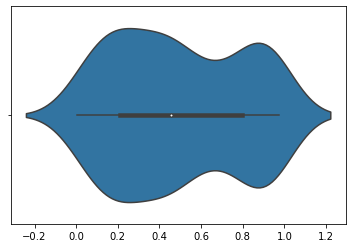

In [4]:
sns.violinplot(x=targets)

In [5]:
log_targets = np.log(targets)

<AxesSubplot:>

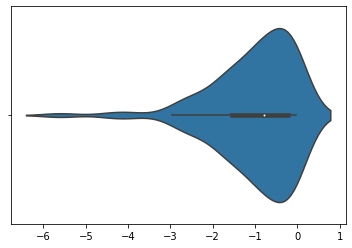

In [6]:
sns.violinplot(x=log_targets)

In [7]:
ztargets = (targets - np.mean(targets))/(np.std(targets))

/cellar/users/aklie/opt/miniconda3/envs/eugene/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

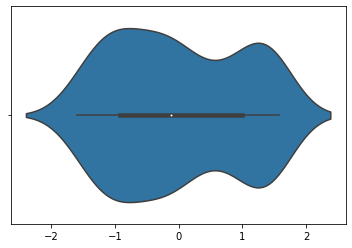

In [8]:
sns.violinplot(ztargets)

## One-hot-encoding 

In [46]:
ohe_seq = eugene.pp.oheDNA(seqs[0])
decoded_seq = eugene.pp.decodeOHE(ohe_seq)
seqs[0], ohe_seq[:5], decoded_seq

('CAGCCGGTCCATACACCAAGGGCATCTACTTGGGCAAGGGTGTACCCCTTGTGGCTTGGAAGAAGG',
 array([[0., 1., 0., 0.],
        [1., 0., 0., 0.],
        [0., 0., 1., 0.],
        [0., 1., 0., 0.],
        [0., 1., 0., 0.]]),
 'CAGCCGGTCCATACACCAAGGGCATCTACTTGGGCAAGGGTGTACCCCTTGTGGCTTGGAAGAAGG')

In [54]:
ohe_seqs = eugene.pp.encodeDNA(seqs)
decoded_seqs = eugene.pp.decodeDNA(ohe_seqs)
seqs[0][:5], ohe_seqs[0][:5], decoded_seqs[0][:5]

('CAGCC',
 array([[0., 1., 0., 0.],
        [1., 0., 0., 0.],
        [0., 0., 1., 0.],
        [0., 1., 0., 0.],
        [0., 1., 0., 0.]]),
 'CAGCC')

## Reverse Complement

In [55]:
rev_seqs = eugene.pp.reverse_complement_seqs(seqs)
rev_ohe_seqs = eugene.pp.encodeDNA(rev_seqs)
decoded_rev_seqs = eugene.pp.decodeDNA(rev_ohe_seqs)
rev_seqs[0], seqs[0], decoded_rev_seqs[0]

('CCTTCTTCCAAGCCACAAGGGGTACACCCTTGCCCAAGTAGATGCCCTTGGTGTATGGACCGGCTG',
 'CAGCCGGTCCATACACCAAGGGCATCTACTTGGGCAAGGGTGTACCCCTTGTGGCTTGGAAGAAGG',
 'CCTTCTTCCAAGCCACAAGGGGTACACCCTTGCCCAAGTAGATGCCCTTGGTGTATGGACCGGCTG')

In [56]:
rev_ohe_seqs[0][:5], rev_seqs[0][:5]

(array([[0., 1., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 0., 1.],
        [0., 0., 0., 1.],
        [0., 1., 0., 0.]]),
 'CCTTC')

## Encode Names

In [57]:
encoded_names = [eugene.pp.ascii_encode(name) for name in names]
decoded_names = [eugene.pp.ascii_decode(name) for name in encoded_names]
names[0], encoded_names[0], decoded_names[0]

('seq001', array([115, 101, 113,  48,  48,  49]), 'seq001')

## Dinucleotide Shuffle

In [45]:
eugene.pp.dinuc_shuffle(seqs[0])

'CCCAGGCCAAACTCACAACACTGTTAGAGCTGGGGCAATTGGGTTGGATAGGTCCGCCCTAGTGGG'

In [58]:
eugene.pp.decodeOHE(eugene.pp.dinuc_shuffle(ohe_seqs[0]))

'CTGGACCGCCCAGTGGGTTCAACTAGGCCCTTTCACAAAGGCATACCAAGTGGCTGATAGGGTGGG'

## Dataset Processing

In [64]:
train_seqs, test_seqs, train_targets, test_targets = eugene.pp.split_train_test(ohe_seqs, ztargets)
len(train_seqs), len(test_seqs), len(train_targets), len(test_targets)

(80, 20, 80, 20)

# OLS Data Subset

## Load 

In [2]:
names, seqs, rev_seqs, targets = eugene.datasets.ols()
names[0], seqs[0], rev_seqs, targets[0]

('S1-G1R-S2-E1F-S3-E2F-S4-G2R-S5-G3F-S6',
 'CATCTGAAGCTCGTTATCTCTAACGGAAGTTTTCGAAAAGGAAATTGCTCAATATCTAAGATAGGA',
 None,
 0.6117667250932141)

<AxesSubplot:>

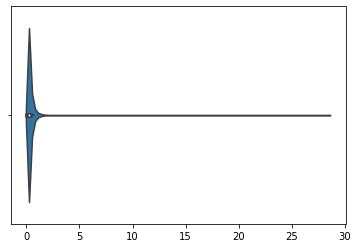

In [3]:
sns.violinplot(x=targets)

In [4]:
ztargets = (targets - np.mean(targets))/np.std(targets)

<AxesSubplot:>

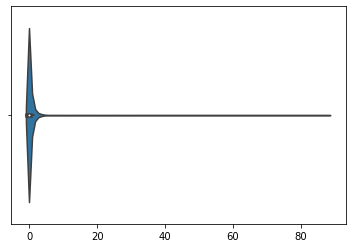

In [5]:
sns.violinplot(x=ztargets)

## Feature encoding 

In [76]:
train_seqs, train_targets = eugene.pp.split_train_test(seqs, targets, subset=0.1)

ValueError: Found input variables with inconsistent numbers of samples: [460800, 460775]

In [6]:
test_seqs, test_targets = seqs[:100], targets[:100]

In [8]:
_, _, _, valid = eugene.pp.otx_encode(test_seqs)

100it [00:00, 407.08it/s]


In [10]:
len(valid)

84

---